In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from utils import misc
import datetime as dt

from simple_backtester import backTester
df = pd.read_csv('datasets/daily_price_series/SPY.csv')
df = misc.clean_df(df)
df = df.set_index('date')

In [2]:
bt = backTester()


df['signal'] = df['close'].rolling(10).mean() - df['close'].rolling(20).mean()
df['signal+1'] = df['signal'].shift(1)

bt.set_asset(df)

trade_list = []
for i in range(len(df)):
    if df['signal'][i] < 0 and df['signal+1'][i] > 0:
        trade_list.append(1)
    elif df['signal'][i] > 0 and df['signal+1'][i] < 0:
        trade_list.append(-1)
    else:
        trade_list.append(0)

df['trade_list'] = trade_list
for i in range(len(trade_list)):
    if bt.open_trade == None:
        if trade_list[i] > 0:
            order_quantity = (bt.cash // bt.adjclose[i]) * trade_list[i]
        else:
            order_quantity = 0
    else:
        if trade_list[i] == -1 or bt.date[i] - bt.open_trade.entry_date > dt.timedelta(days=40):
        # if trade_list[i] == -1:
            order_quantity = bt.position * -1
        else:
            order_quantity = 0
    bt.take_action(order_quantity=order_quantity)

        


end


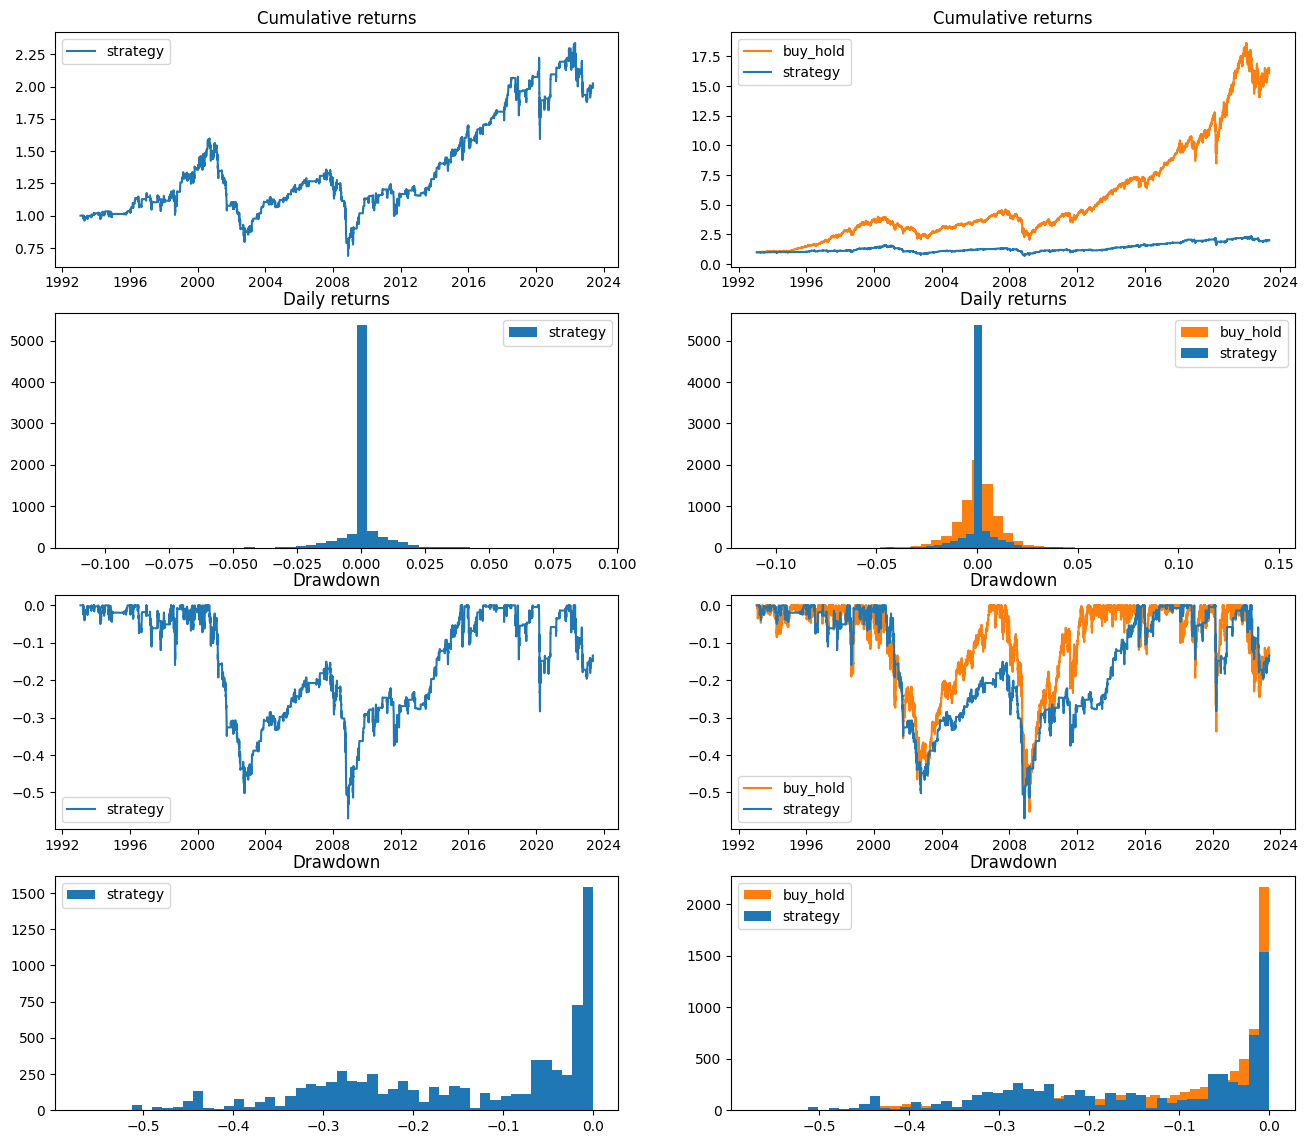

In [3]:
bt.analyse()
bt.plot_graphs()

In [4]:
print(f'Annualised return:          {bt.annual_return}')
print(f'buy_hold annual return:     {bt.buy_hold_annual_return}')
print(f'Annualised vol:             {bt.annual_vol}')
print(f'buy_hold annual vol:        {bt.buy_hold_annual_vol}')
print(f'Sharpe ratio:               {bt.sharpe}')
print(f'buy_hold Sharpe ratio:      {bt.buy_hold_sharpe}')

Annualised return:          0.0235765163784607
buy_hold annual return:     0.09687396348963162
Annualised vol:             0.13696213911353028
buy_hold annual vol:        0.1889607298403136
Sharpe ratio:               0.17213893219729665
buy_hold Sharpe ratio:      0.5126671746637389


In [5]:
bt.trade_record.analyse()
bt.trade_record.stats

{'num_wins': 131,
 'num_loss': 56,
 'win_rate': 0.7005347593582888,
 'profit_total': 1001836.2831897741,
 'profit_mean': 5357.413279089701,
 'returns_mean': 0.00477661294242487,
 'returns_std': 0.04434685911622584,
 'time_in_trade_mean': 21.13368983957219,
 'time_in_trade_std': 11.955485930683336,
 'capital_at_risk_mean': 1341446.2769279175,
 'win_returns_mean': 0.02486676680379992,
 'win_returns_std': 0.01894197660301074,
 'win_profit_mean': 32998.8267147996,
 'win_time_in_trade_mean': 16.519083969465647,
 'win_time_in_trade_std': 8.582048477928232,
 'loss_returns_mean': -0.04221999698329177,
 'loss_returns_std': 0.05091746254427996,
 'loss_profit_mean': -59303.75029373168,
 'loss_time_in_trade_mean': 31.928571428571427,
 'loss_time_in_trade_std': 11.828866299103982}

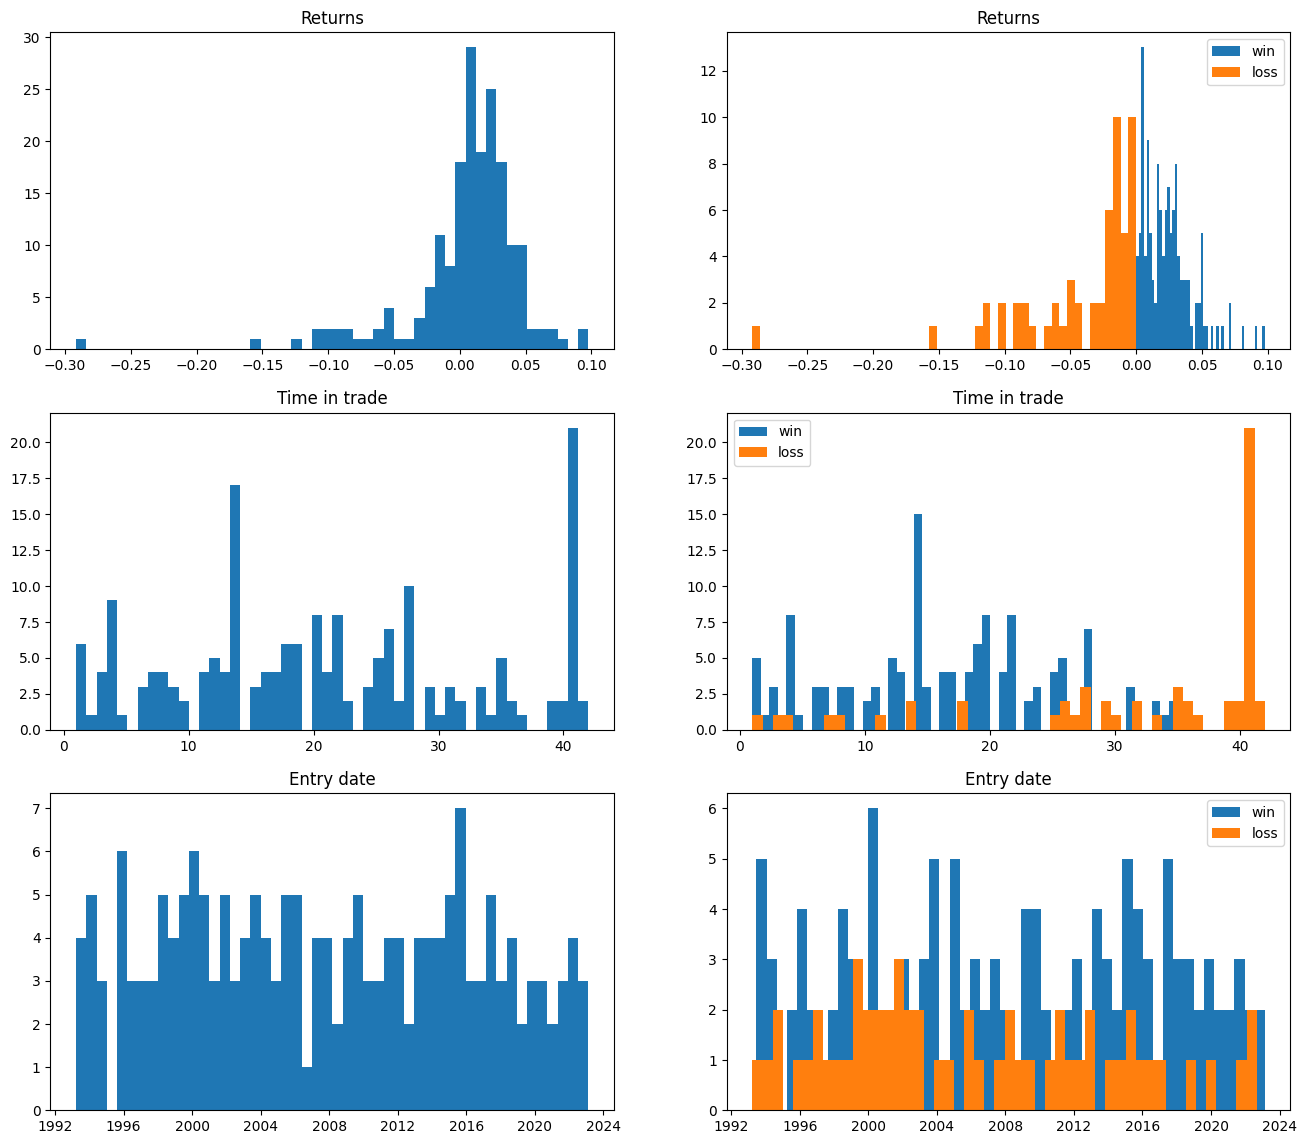

In [6]:
bt.trade_record.plot_graphs()

<Axes: >

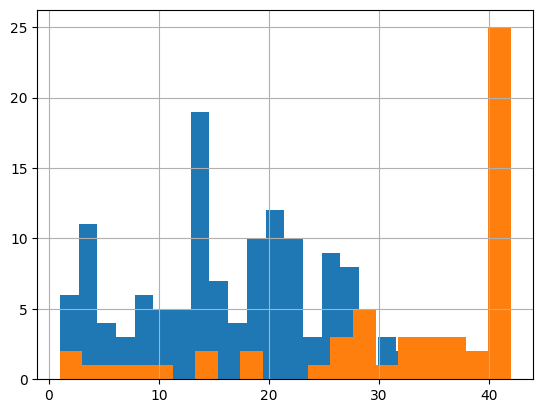

In [7]:
bt.trade_record.win_records['time_in_trade'].hist(bins=20)
bt.trade_record.loss_records['time_in_trade'].hist(bins=20)

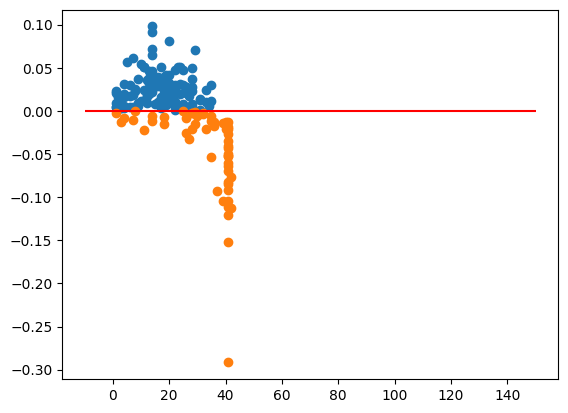

In [8]:
plt.scatter(bt.trade_record.win_records['time_in_trade'], bt.trade_record.win_records['returns'])
plt.scatter(bt.trade_record.loss_records['time_in_trade'], bt.trade_record.loss_records['returns'])
plt.hlines(0, -10, 150, color='red')